In [36]:
# Adapted from : https://github.com/amanjainblr/DataScienceProjects/blob/bff513e596d95af6024bfa82394ac16c470e2b50/notebooks/radiant-mlhub-api-know-how.ipynb
########################################################################################################
### Note: the notebook is not finished, it should be improved and further adapted to downlad sources


import urllib.parse
import re
from pathlib import Path
import itertools as it
from functools import partial
from concurrent.futures import ThreadPoolExecutor
import urllib.parse
from pathlib import Path
import requests

import rasterio
from rasterio.plot import show
from matplotlib import pyplot
import matplotlib.pyplot as plt

from tqdm.notebook import tqdm
from radiant_mlhub import client, get_session

import os
os.environ['MLHUB_API_KEY'] = 'YOUR KEY'


In [33]:
# List all available collections and view their properties

In [77]:
collections = client.list_collections()
for c in collections:
    collection_id = c['id']
    license = c.get('license', 'N/A')
    citation = c.get('sci:citation', 'N/A')

    print(f'ID:       {collection_id}\nLicense:  {license}\nCitation: {citation}\n')

ID:       ramp_sylhet_bangladesh_labels
License:  CC-BY-NC-4.0
Citation: DevGlobal, (2022). ramp Building Footprint Training Dataset - Sylhet, Bangladesh, Version 1.0, [Date Accessed]. Radiant MLHub. https://doi.org/10.34911/rdnt.fnv87x

ID:       ramp_sylhet_bangladesh_source
License:  CC-BY-NC-4.0
Citation: DevGlobal, (2022). ramp Building Footprint Training Dataset - Sylhet, Bangladesh, Version 1.0, [Date Accessed]. Radiant MLHub. https://doi.org/10.34911/rdnt.fnv87x

ID:       ref_landcovernet_sa_v1_source_landsat_8
License:  CC-BY-4.0
Citation: Radiant Earth Foundation (2022) "LandCoverNet South America: A Geographically Diverse Land Cover Classification Training Dataset", Version 1.0, Radiant MLHub. https://doi.org/10.34911/rdnt.6a27yv

ID:       ramp_wa_ghana_source
License:  CC-BY-NC-4.0
Citation: DevGlobal, (2022). ramp Building Footprint Training Dataset - Wa, Ghana, Version 1.0, [Date Accessed]. Radiant MLHub. https://doi.org/10.34911/rdnt.6l9q5d

ID:       ref_landcovernet_

In [78]:
# Here I will focus on the labels
collection_id = 'ref_landcovernet_af_v1_labels'

In [79]:
af_labels = next(c for c in collections if c['id'] == collection_id)
af_labels

{'id': 'ref_landcovernet_af_v1_labels',
 'type': 'Collection',
 'links': [{'rel': 'items',
   'type': 'application/geo+json',
   'href': 'https://api.radiant.earth/mlhub/v1/collections/ref_landcovernet_af_v1_labels/items'},
  {'rel': 'parent',
   'type': 'application/json',
   'href': 'https://api.radiant.earth/mlhub/v1/'},
  {'rel': 'root',
   'type': 'application/json',
   'href': 'https://api.radiant.earth/mlhub/v1/'},
  {'rel': 'self',
   'type': 'application/json',
   'href': 'https://api.radiant.earth/mlhub/v1/collections/ref_landcovernet_af_v1_labels'}],
 'extent': {'spatial': {'bbox': [[-15.937860500150009,
     -31.68783755999348,
     46.87392100826879,
     31.339825523515234]]},
  'temporal': {'interval': [['2018-01-01T00:00:00Z',
     '2018-12-31T00:00:00Z']]}},
 'license': 'CC-BY-4.0',
 'sci:doi': '10.34911/rdnt.d2ce8i',
 'providers': [{'url': 'https://radiant.earth',
   'name': 'Radiant Earth Foundation',
   'roles': ['processor', 'licensor']}],
 'description': 'LandCove

In [84]:
# Select an item
#  the "id" property of the collection that we fetched above as the collection_id 
#  argument to the list_collection_items function
items_iterator = client.list_collection_items(af_labels['id'])

# Get the first item
first_item = next(items_iterator)
first_item

{'id': 'ref_landcovernet_af_v1_labels_38PKT_29',
 'bbox': [42.25739405898637,
  11.498068111280931,
  42.28106547373011,
  11.521413613285764],
 'type': 'Feature',
 'links': [{'rel': 'collection',
   'type': 'application/json',
   'href': 'https://api.radiant.earth/mlhub/v1/collections/ref_landcovernet_af_v1_labels'},
  {'rel': 'parent',
   'type': 'application/json',
   'href': 'https://api.radiant.earth/mlhub/v1/collections/ref_landcovernet_af_v1_labels'},
  {'rel': 'root',
   'type': 'application/json',
   'href': 'https://api.radiant.earth/mlhub/v1/'},
  {'rel': 'self',
   'type': 'application/geo+json',
   'href': 'https://api.radiant.earth/mlhub/v1/collections/ref_landcovernet_af_v1_labels/items/ref_landcovernet_af_v1_labels_38PKT_29'},
  {'rel': 'source',
   'href': 'https://api.radiant.earth/mlhub/v1/collections/ref_landcovernet_af_v1_source_sentinel_2/items/ref_landcovernet_af_v1_source_sentinel_2_38PKT_29_20180101'},
  {'rel': 'source',
   'href': 'https://api.radiant.earth/m

In [ ]:
# to download a number of items 
# client.list_collection_items(collection['id'], limit=150)

In [61]:
# Labels available
first_item.get('assets', {}).get('labels')

{'href': 'https://api.radiant.earth/mlhub/v1/download/gAAAAABkFEgO4oI10MwXd7MznSHfBgI0MwxXth3KTv_uWt-ntNPj7sKASgVg0zI5GRqe9oePft-Q8Kcivebj5U6Nv2Q21ZdkqVEK_MuFWl1fSOg204vE3Lj_0d76j-n-1XRRCIyhwze0TP9nx9aS8ByGD_T0tWtxdBLLyyT8Fs-c4E596PQQE9l6ayqs3ZT_r-hMK2Pzhx2MIN_32xkxuk6Tdf3Yca1uC8YvYd7dxzaYHWAIKzsHDlaqG4wlY7nsfiz_diEEnjFvMmvDc8AC4XFoRkI3uFzQm3RbbzOMxQk6W5VmXe2aOjxeu2IPaQ7Yw4X0M_pNrzxZ',
 'title': 'Land Cover',
 'file:values': [{'value': [0], 'summary': 'No Data'},
  {'value': [1], 'summary': 'Water'},
  {'value': [2], 'summary': 'Artificial Bareground'},
  {'value': [3], 'summary': 'Natural Bareground'},
  {'value': [4], 'summary': 'Permanent Snow/Ice'},
  {'value': [5], 'summary': 'Woody Vegetation'},
  {'value': [6], 'summary': 'Cultivated Vegetation'},
  {'value': [7], 'summary': '(Semi) Natural Vegetation'}]}

In [45]:
output_dir= '/Users/noeliaotero/Documents/Geo_analysis/data/labels/'
if not os.path.exists(output_dir):
    os.makedirs(output_dir)

In [46]:
# Helper function to download
def download(item, asset_key, output_dir):
    # Try to get the given asset and return None if it does not exist
    asset = item.get('assets', {}).get(asset_key)
    if asset is None:
        print(f'Asset "{asset_key}" does not exist in this item')
        return None
    
    # Try to get the download URL from the asset and return None if it does not exist
    download_url = asset.get('href')
    if download_url is None:
        print(f'Asset {asset_key} does not have an "href" property, cannot download.')
        return None
    
    session = get_session()
    r = session.get(download_url, allow_redirects=True, stream=True)
    
    filename = urllib.parse.urlsplit(r.url).path.split('/')[-1]
    output_path = Path(output_dir) / filename

    
    with output_path.open('wb') as dst:
        for chunk in r.iter_content(chunk_size=512 * 1024):
            if chunk:
                dst.write(chunk)
    
    print(f'Downloaded to {output_path.resolve()}')
    

In [47]:
# Download one item
download(first_item, 'labels',output_dir)

Downloaded to /Users/noeliaotero/Documents/Geo_analysis/data/labels/38PKT_29_2018_LC_10m.tif


In [49]:
source_links = [link for link in first_item['links'] if link['rel'] == 'source']
print(f'Number of Source Items: {len(source_links)}')
print(source_links)

Number of Source Items: 167
[{'rel': 'source', 'href': 'https://api.radiant.earth/mlhub/v1/collections/ref_landcovernet_af_v1_source_sentinel_2/items/ref_landcovernet_af_v1_source_sentinel_2_38PKT_29_20180101'}, {'rel': 'source', 'href': 'https://api.radiant.earth/mlhub/v1/collections/ref_landcovernet_af_v1_source_sentinel_2/items/ref_landcovernet_af_v1_source_sentinel_2_38PKT_29_20180106'}, {'rel': 'source', 'href': 'https://api.radiant.earth/mlhub/v1/collections/ref_landcovernet_af_v1_source_sentinel_2/items/ref_landcovernet_af_v1_source_sentinel_2_38PKT_29_20180111'}, {'rel': 'source', 'href': 'https://api.radiant.earth/mlhub/v1/collections/ref_landcovernet_af_v1_source_sentinel_2/items/ref_landcovernet_af_v1_source_sentinel_2_38PKT_29_20180116'}, {'rel': 'source', 'href': 'https://api.radiant.earth/mlhub/v1/collections/ref_landcovernet_af_v1_source_sentinel_2/items/ref_landcovernet_af_v1_source_sentinel_2_38PKT_29_20180121'}, {'rel': 'source', 'href': 'https://api.radiant.earth/mlh

In [86]:
for i in iter(items_iterator):
    download(i, 'labels', output_dir)
    

Downloaded to /Users/noeliaotero/Documents/Geo_analysis/data/labels/38PKT_28_2018_LC_10m.tif
Downloaded to /Users/noeliaotero/Documents/Geo_analysis/data/labels/38PKT_27_2018_LC_10m.tif
Downloaded to /Users/noeliaotero/Documents/Geo_analysis/data/labels/38PKT_26_2018_LC_10m.tif
Downloaded to /Users/noeliaotero/Documents/Geo_analysis/data/labels/38PKT_25_2018_LC_10m.tif
Downloaded to /Users/noeliaotero/Documents/Geo_analysis/data/labels/38PKT_24_2018_LC_10m.tif
Downloaded to /Users/noeliaotero/Documents/Geo_analysis/data/labels/38PKT_23_2018_LC_10m.tif
Downloaded to /Users/noeliaotero/Documents/Geo_analysis/data/labels/38PKT_22_2018_LC_10m.tif
Downloaded to /Users/noeliaotero/Documents/Geo_analysis/data/labels/38PKT_21_2018_LC_10m.tif
Downloaded to /Users/noeliaotero/Documents/Geo_analysis/data/labels/38PKT_20_2018_LC_10m.tif


In [94]:
# Open and visualize one file
def plot_label(label_path):
    src = rasterio.open(label_path)
    image = src.read()
    show(image)

In [99]:
file_label = output_dir + '38PKT_28_2018_LC_10m.tif'
src = rasterio.open(file_label)
image = src.read()

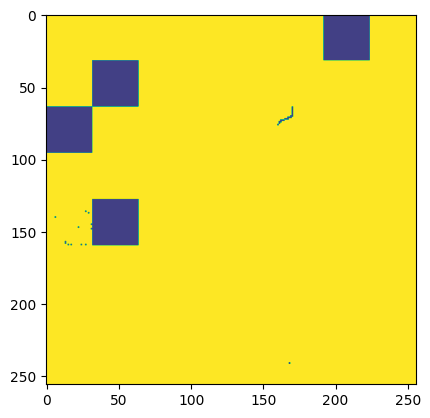

In [107]:
plt.imshow(image[1,...])